# CART (Classification and Regression Tree) Vs. Linear regression

The purpose of this exercise is to provide an initial sense on how decision Tree compares to a conventional linear regression when the response variable is quantitative.

1.  To begin, construct a regression dataset with known properties:

    ```
    x1 = np.random.normal(size = 300)
    x2 = np.random.normal(size = 300)
    error = 2 * np.random.normal(size = 300)
    y1 = 1 + (2 * x1) + (3 * x2) + error
    ```

    - Apply conventional linear regression using. Then fit a Regression Tree (RT), and print it. 
    - Compare the regression output to the way in which the data were actually generated. 
    - Compare the tree diagram to the way in which the data were actually generated. 
    - Compare how well linear regression and regression Tree fit the data. 
    - What do you conclude about the relative merits of linear regression and RT when the *f(X)* is actually linear and additive ?

2. Now, redefine the two predictors as binary factors and reconstruct the response variable:

    Transform predictors into binary factors
    ```
   x11 = (x1 > 0).astype(int)
   x22 = (x2 > 0).astype(int)
    ```
   Reconstruct the response variable
    ```
   y = 1 + (2 * x11) + (3 * x22) + error
    ```
    - Repeat the comparison. What do you conclude when the *f(X)* is actually a step function and additive ?

3. Under what circumstances is CART likely to perform better than linear regression ? Consider separately the matter of how well the fitted values correspond to the observed values and the implementation of how the predictors are related to the response.


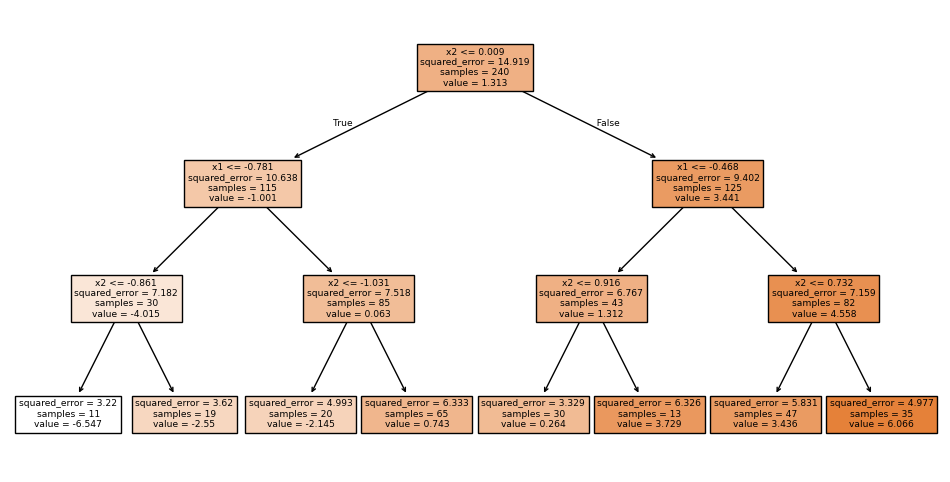

In [15]:
#1

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

x1 = np.random.normal(size=300)
x2 = np.random.normal(size=300)
error = 2 * np.random.normal(size = 300)
y1 = 1 + (2 * x1) + (3 * x2) + error


X = np.column_stack((x1, x2))



X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lin = linear_model.predict(X_test)


tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)


plt.figure(figsize=(12, 6))
plot_tree(tree_reg, feature_names=['x1', 'x2'], filled=True)
plt.show()



In [16]:
# Compare the regression output to the way in which the data were 
# actually generated.

print("True B0:", 1)
print("Estimated B0:", linear_model.intercept_)

print("True B1, B2: [2, 3]")
print("Estimated B1, B2:", linear_model.coef_)


True B0: 1
Estimated B0: 1.2437033437510348
True B1, B2: [2, 3]
Estimated B1, B2: [1.95167381 2.83267335]


In [ ]:
# Compare how well 
# linear regression and regression Tree fit the data. 
from sklearn.metrics import mean_squared_error

print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lin))
print("Regression Tree MSE:", mean_squared_error(y_test, y_pred_tree))


Linear Regression MSE: 3.7926832812352784
Regression Tree MSE: 6.264471553400876


Linear Regression performed better, has lower MSE.

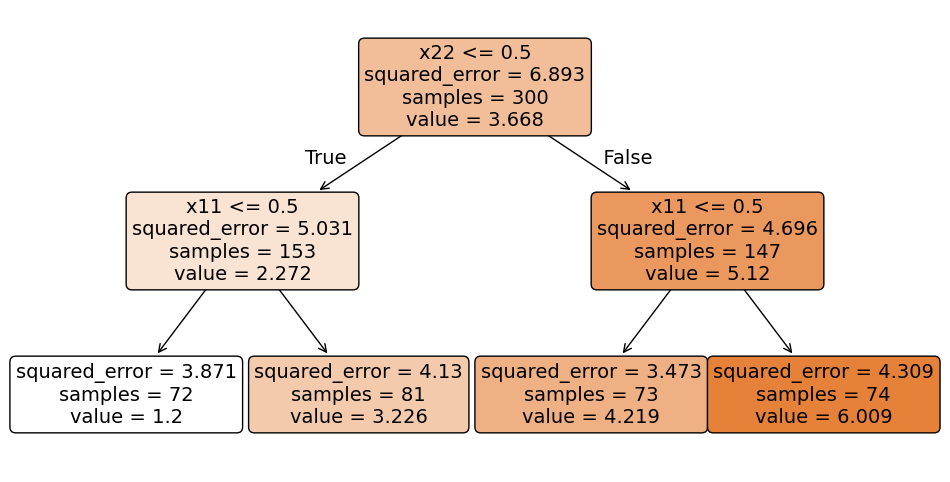

In [ ]:
# 2. Now, redefine the two predictors as binary factors and reconstruct the response variable

x11 = (x1 > 0).astype(int)
x22 = (x2 > 0).astype(int)

y = 1 + (2 * x11) + (3 * x22) + error

X_bin = np.column_stack((x11, x22))


lr_model = LinearRegression()
lr_model.fit(X_bin, y)
y_pred_lr = lr_model.predict(X_bin)



tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model.fit(X_bin, y)
y_pred_tree = tree_model.predict(X_bin)

plt.figure(figsize=(12, 6))
plot_tree(tree_model, feature_names=["x11", "x22"], filled=True, rounded=True)
plt.show()


# When the true underlying function f(X) is a step function and additive, both Linear Regression 
# and Regression Trees (RT) can model the data reasonably well

3. CART automatically captures interactions by splitting on one variable and then another.

Linear Regression needs interaction terms to be specified manually.

# CART and Gini Index


### Overview and Dataset
In this notebook, we will use a **Decision Tree** classifier to predict the **Tax_Regime** (Exempt, Flat, or Progressive) for various entities (companies/individuals), given their **Country**, **Industry**, **Annual_Income**, and **Number_of_Employees**. 

We will also explore how **Gini impurity** guides the tree's splitting decisions.


## Part 1: Gini Impurity and Manual Split Calculations

### Task - 1 Compute the Root Gini Impurity
    Understand the dataset and find interesting patterns :
        - Calculate the overall Gini of the target variable (Tax_Regime) for the entire dataset
        - Show your formula and numerical steps for first 10-15 rows

In [23]:
import pandas as pd

data = pd.read_csv("../data/tax_data.csv")
df = pd.DataFrame(data)
print(df)

          Country       Industry  Annual_Income  Employees   Tax_Regime
0             USA           Tech         120000         10  Progressive
1             USA         Retail          30000          2         Flat
2             USA        Finance          45000          3         Flat
3          Canada           Tech          80000          5  Progressive
4          Canada  Manufacturing          35000         15         Flat
..            ...            ...            ...        ...          ...
102  South_Africa           Tech          75000          9  Progressive
103     Australia     Consulting          40000          4         Flat
104     Australia        Finance         100000         12  Progressive
105         Japan        Finance          85000          6         Flat
106         Japan      Education          15000          1       Exempt

[107 rows x 5 columns]


In [24]:
rows = df.head(15)

class_counts = rows['Tax_Regime'].value_counts()

print(class_counts)

Tax_Regime
Flat           6
Progressive    5
Exempt         4
Name: count, dtype: int64


In [25]:
total = len(rows)
proportions = class_counts / total
print(proportions)

Tax_Regime
Flat           0.400000
Progressive    0.333333
Exempt         0.266667
Name: count, dtype: float64


In [35]:
def gini_impurity(series):
    proportions = series.value_counts(normalize=True)
    return 1 - sum(proportions ** 2)

print("Gini index formula: Gini index = 1 - Σ(pᵢ²)")

Gini index formula: Gini index = 1 - Σ(pᵢ²)


In [36]:
for label, p in proportions.items():
    print(f" - {label}: p² = {p**2:.2f}")

print(f"Root Gini Impurity (first 15 rows): {gini_impurity(rows['Tax_Regime']):.3f}")

 - Flat: p² = 0.16
 - Progressive: p² = 0.11
 - Exempt: p² = 0.07
Root Gini Impurity (first 15 rows): 0.658


### Task 2 – Split by One Feature
    Understand the dataset and find interesting patterns :
        - Choose one feature (e.g., Annual_Income, Employees, or a categorical column) to perform a manual split
            - If numeric (e.g., Annual_Income): pick a threshold (e.g., s < 60000 vs. s >= 60000)
            - If categorical (e.g., Country): pick some subset of countries vs. the others 
        - Separate the dataset into two subsets and compute the Gini impurity for each subset

In [38]:
threshold = 60000

subset_low = df[df['Annual_Income'] < threshold]
subset_high = df[df['Annual_Income'] >= threshold]

gini_low = gini_impurity(subset_low['Tax_Regime'])
gini_high = gini_impurity(subset_high['Tax_Regime'])

print(f"Subset 1: Annual_Income < {threshold}")
print(f" - Size: {len(subset_low)}")
print(f" - Gini Impurity: {gini_low:.4f}")

print(f"\nSubset 2: Annual_Income ≥ {threshold}")
print(f" - Size: {len(subset_high)}")
print(f" - Gini Impurity: {gini_high:.4f}")

Subset 1: Annual_Income < 60000
 - Size: 60
 - Gini Impurity: 0.4978

Subset 2: Annual_Income ≥ 60000
 - Size: 47
 - Gini Impurity: 0.4491


### Task 3 - Weighted Average Gini After Split


$$

G(t) = p_l \cdot G(t_l) + p_r \cdot G(t_r)

$$
where :
- $  G(t)  $ : Represents the **Gini impurity of the split** at a node $  t  $ .
- $  p_l  $ : Proportion of samples in the **left child** ($  t_l  $ ).
- $  G(t_l)  $ : Gini impurity of the left child.
- $  p_r  $ : Proportion of samples in the **right child** ($  t_r  $ ).
- $  G(t_r)  $ : Gini impurity of the right child.



Compare this to the root Gini impurity and discuss if the reduction is significant

In [ ]:
root_gini = gini_impurity(df['Tax_Regime'])
print(f"Root Gini Impurity (before split): {root_gini:.4f}")

p_left = len(subset_low) / len(df)
p_right = len(subset_high) / len(df)

weighted_gini = p_left * gini_low + p_right * gini_high


print(f"\nLeft Subset: Size = {len(subset_low)}, Gini = {gini_low:.4f}, Proportion = {p_left:.3f}")
print(f"Right Subset: Size = {len(subset_high)}, Gini = {gini_high:.4f}, Proportion = {p_right:.3f}")

print(f"\nWeighted Gini After Split: {weighted_gini:.4f}")
print(f"Gini Reduction: {root_gini - weighted_gini:.4f}")

Root Gini Impurity (before split): 0.6575

Left Subset: Size = 60, Gini = 0.4978, Proportion = 0.561
Right Subset: Size = 47, Gini = 0.4491, Proportion = 0.439

Weighted Gini After Split: 0.4764
Gini Reduction: 0.1811


## Part 2: Building and Evaluating a Decision Tree

### Task 1 - Data Preparation
Prepare the data as usual :

    - Do some data analysis (they should be insighful for the problem)
    - For categorical features (Country, Industry), convert them to dummy variables
    - Split off the target
    - Create a 70/30 train-test split

In [50]:
print(df.describe())

       Annual_Income   Employees
count     107.000000  107.000000
mean    59018.691589    6.691589
std     33941.120302    5.180535
min     10000.000000    1.000000
25%     29000.000000    2.000000
50%     50000.000000    5.000000
75%     87500.000000   10.000000
max    150000.000000   20.000000


In [43]:
df_encoded = pd.get_dummies(df, columns=['Country', 'Industry'], drop_first=True)
X = df_encoded.drop('Tax_Regime', axis=1)
y = df_encoded['Tax_Regime']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y  # stratify keeps class distribution
)

### Task 2 - Decision Tree Classifier with Gini
    - Initialize and fit
    - Tune hyperparameters like max_depth, min_samples_leaf, etc

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy before hyperparameter tuning: {accuracy:.4f}")



Accuracy before hyperparameter tuning: 0.6970


In [52]:
# tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

best_dt_classifier = grid_search.best_estimator_
y_pred_tuned = best_dt_classifier.predict(X_test)


accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy after hyperparameter tuning: {accuracy_tuned:.4f}")

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best hyperparameters: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy after hyperparameter tuning: 0.8485


### Task 3 - Predictions and Evaluation
    - Predict on the test set
    - Calculate and analyse different classification metrics

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred_tuned = best_dt_classifier.predict(X_test)

precision = precision_score(y_test, y_pred_tuned, average='weighted')  
recall = recall_score(y_test, y_pred_tuned, average='weighted')
f1 = f1_score(y_test, y_pred_tuned, average='weighted')

print(f"Precision : {precision:.4f}")
print(f"Recall : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")




Precision : 0.8648
Recall : 0.8485
F1 Score : 0.8478


### Task 4 - Tree Structure
    - Plot and check out how is the tree splitting
    - Compare the top splits with your manual Gini analysis from Part 1
    - Re train with different max_depth values and compare
    - Discuss what are the pro and cons of growing a deep Tree
    - Remember what is the variance of an estimator. Discuss why the variance of a decision tree might be large. Find a way to vizualize it.

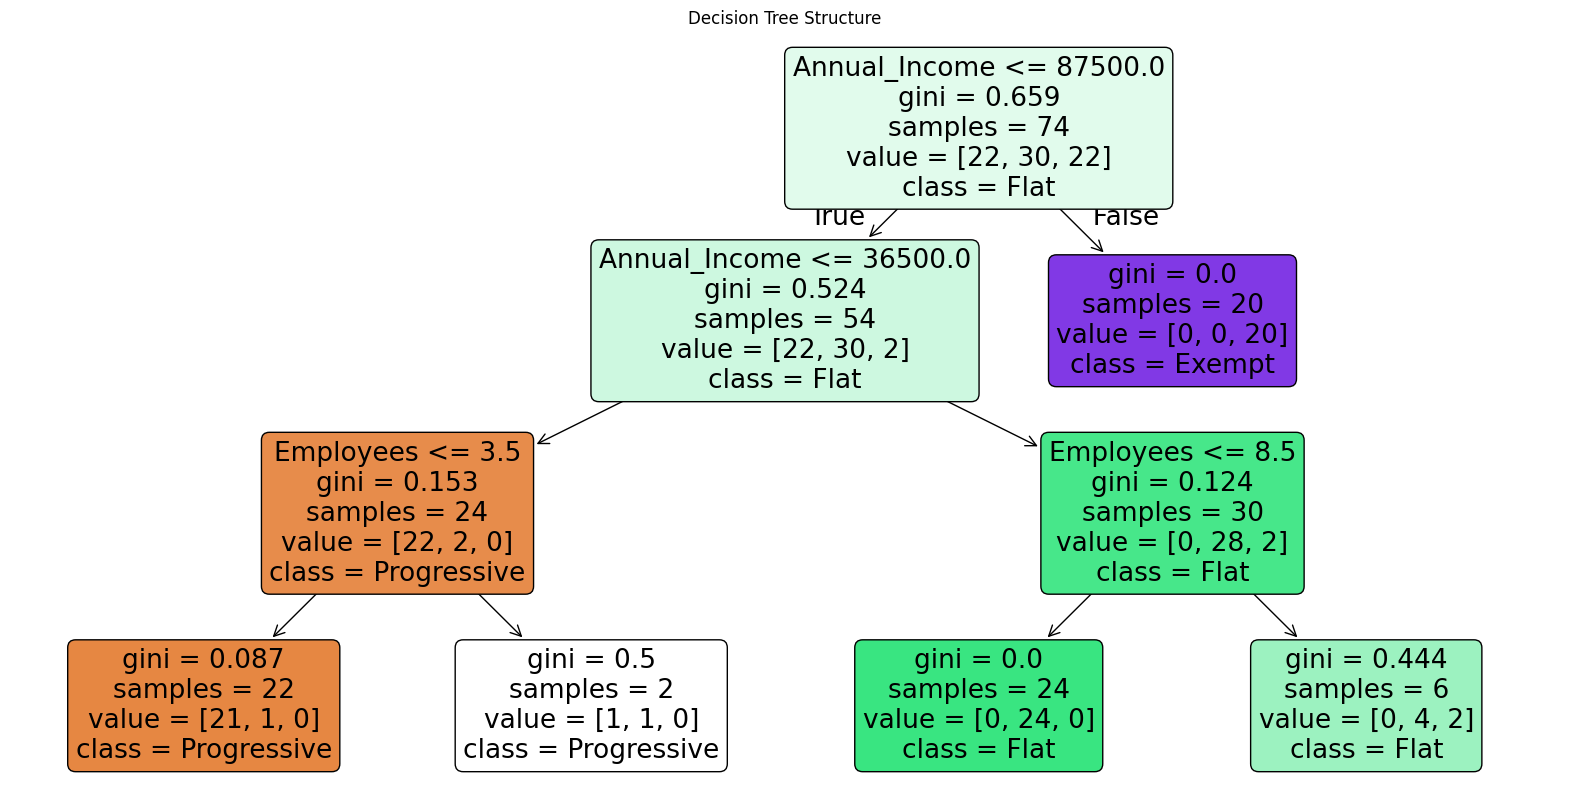

In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


class_names = [str(label) for label in y.unique()]


plt.figure(figsize=(20, 10))
plot_tree(best_dt_classifier, filled=True, feature_names=X.columns, class_names=class_names, rounded=True)
plt.title("Decision Tree Structure")
plt.show()


Accuracy for max_depth=3: 0.8182
Accuracy for max_depth=5: 0.6970
Accuracy for max_depth=10: 0.6970
Accuracy for max_depth=15: 0.6970
Accuracy for max_depth=None: 0.6970


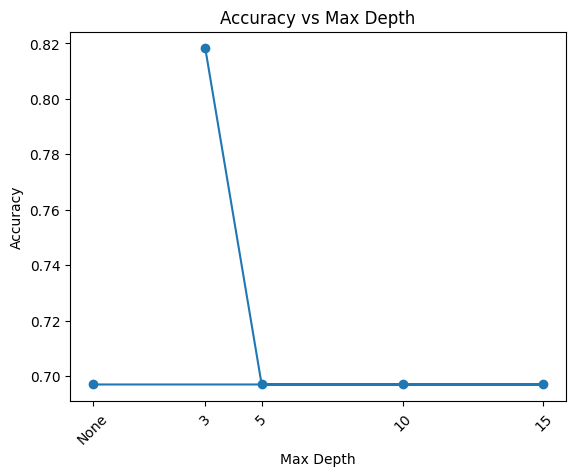

In [ ]:
max_depth_values = [3, 5, 10, 15]
scores = {}


for depth in max_depth_values:
    dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    dt_classifier.fit(X_train, y_train)
    y_pred = dt_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores[depth] = accuracy
    print(f"Accuracy for max_depth={depth}: {accuracy:.4f}")


dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
accuracy_none = accuracy_score(y_test, y_pred)
scores['None'] = accuracy_none
print(f"Accuracy for max_depth=None: {accuracy_none:.4f}")


depth_values_for_plot = [depth if depth != 'None' else -1 for depth in scores.keys()]  # Replace 'None' with a numeric placeholder
accuracy_values_for_plot = list(scores.values())


plt.plot(depth_values_for_plot, accuracy_values_for_plot, marker='o')
plt.title('Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')


xticks_labels = [str(depth) if depth != -1 else 'None' for depth in depth_values_for_plot]
plt.xticks(depth_values_for_plot, xticks_labels, rotation=45)
plt.show()

Pros:

A deep tree can capture more complex patterns in the data.


Cons:

A deep tree may overfit and have a high variance, making the model unstable across different data sets.



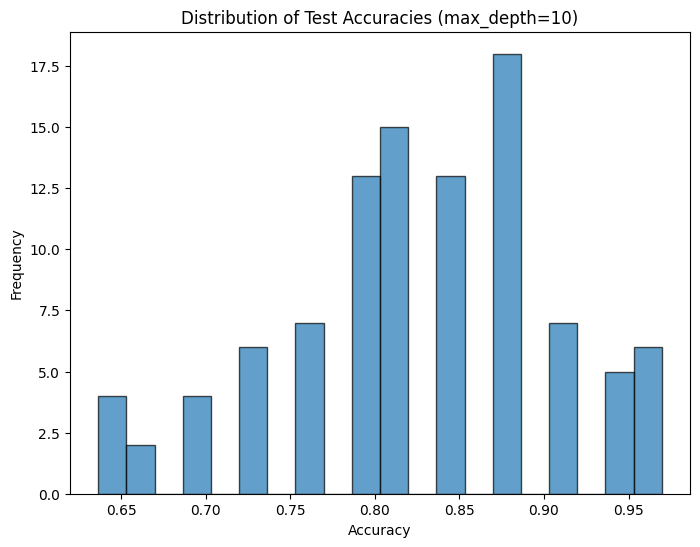

In [62]:

from sklearn.metrics import accuracy_score
from sklearn.utils import resample


n_iterations = 100  
test_accuracies = []  
max_depth = 10  

for _ in range(n_iterations):
    # random bootstrap sample of the training data
    X_train_subset, y_train_subset = resample(X_train, y_train, random_state=None)
    
  
    dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=42)
    dt_classifier.fit(X_train_subset, y_train_subset)
    

    y_pred = dt_classifier.predict(X_test)
    
   
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracies.append(accuracy)


plt.figure(figsize=(8, 6))
plt.hist(test_accuracies, bins=20, edgecolor='black', alpha=0.7)
plt.title(f'Distribution of Test Accuracies (max_depth={max_depth})')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

